# Assignment 2: Regression and classification

Authors: Kevin To and Filip Cederqvist

Work load: 

Note: The dataset in question 1 have been gathered from www.hemnet.se

## 1: Hemnet database

a) Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe what you did and explain why.

In [195]:
# Importing packages

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [196]:
# Import data
df = pd.read_csv("./Datasets/data_assignment2.csv")
display(df.head())

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


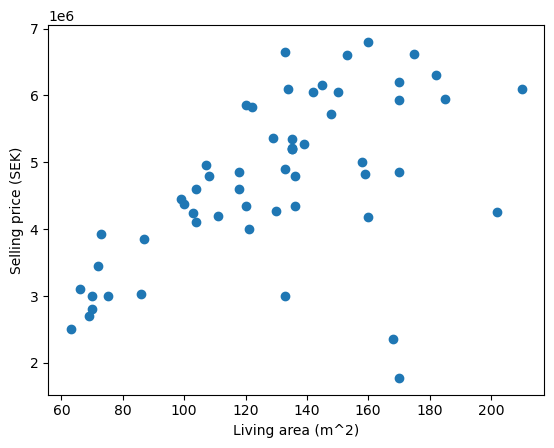

In [197]:
# Scatter plot
xvalues=df['Living_area']
yvalues=df['Selling_price']

plt.xlabel('Living area (m^2)')
plt.ylabel('Selling price (SEK)')

plt.scatter(xvalues,yvalues)
plt.show()

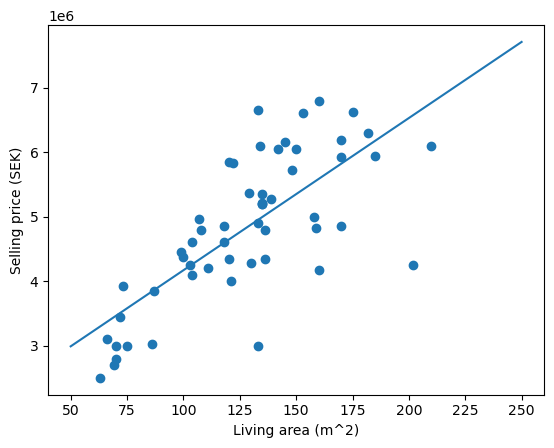

In [198]:
# Dropping the outliers which seems to have some other factor affecting the price in a dramatic way

df = df.drop(axis=0, index=40)
df = df.drop(axis=0, index=45)
df.reset_index(drop=True, inplace=True)

# Scatter plot
xvalues=df['Living_area']
yvalues=df['Selling_price']

plt.xlabel('Living area (m^2)')
plt.ylabel('Selling price (SEK)')

plt.scatter(xvalues,yvalues)

# Fitting a linear regression model
model = LinearRegression().fit(xvalues.array.reshape(-1,1), yvalues.array.reshape(-1,1))
xfit = np.linspace(50, 250, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit)
plt.show()

b) What are the values of the slope and intercept of the regression line?

In [199]:
slope = model.coef_
print("The slope of the regression line is:",str(slope[0][0]))
intercept = model.intercept_
print("The intercepet of the regression line is:",str(intercept[0]))

The slope of the regression line is: 23597.794749444976
The intercepet of the regression line is: 1809821.2159409611


c) Use this model to predict the selling prices of houses which have living area 10 m2, 100 m2, 150 m2, 200 m2, 1000 m2

In [200]:
"""
price_for_10 = model.predict([[10]])
price_for_100 = model.predict([[100]])
price_for_150 = model.predict([[150]])
price_for_200 = model.predict([[200]])
price_for_1000 = model.predict([[1000]])

print("The price for a house with 10 square meters is:",str(round(price_for_10[0][0],0)))
print("The price for a house with 100 square meters is:",str(round(price_for_100[0][0],0)))
print("The price for a house with 150 square meters is:",str(round(price_for_150[0][0],0)))
print("The price for a house with 200 square meters is:",str(round(price_for_200[0][0],0)))
print("The price for a house with 1000 square meters is:",str(round(price_for_1000[0][0],0)))
"""
square_meters = [10,100,150,200,1000]

for value in square_meters:
    print("The price for a house with",str(value),"square meters is:",str(round(model.predict([[value]])[0][0],0)))


The price for a house with 10 square meters is: 2045799.0
The price for a house with 100 square meters is: 4169601.0
The price for a house with 150 square meters is: 5349490.0
The price for a house with 200 square meters is: 6529380.0
The price for a house with 1000 square meters is: 25407616.0


d) Draw a residual plot

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


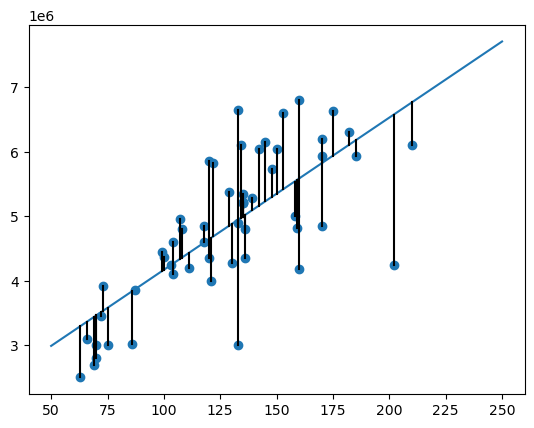

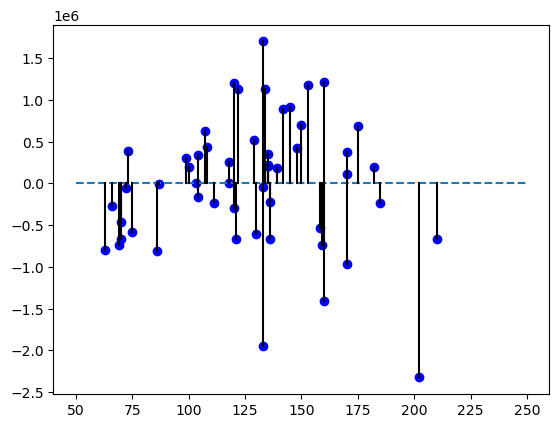

In [201]:
#residual plot not adjusted to the x-axis
yfit_residual = model.predict(xvalues.array.reshape(-1,1))
plt.plot(xfit,yfit)
plt.scatter(xvalues,yvalues)
for i in range(0, len(xvalues)):
    plt.plot([xvalues[i], xvalues[i]], [yvalues[i], yfit_residual[i]], 'k-')
plt.show()

#residual plot adjusted to the x-axis
plt.plot([50,250],[0,0], linestyle='dashed')
for i in range(0, len(xvalues)):
    plt.scatter(xvalues[i], yvalues[i]-yfit_residual[i], color='blue')
    plt.plot([xvalues[i], xvalues[i]], [yvalues[i]- yfit_residual[i], 0], 'k-')

e) Is this a useful model? Are there any limitations? What could you do to improve the models ability to predict selling prices? Can this model be used in other areas than Landvetter?

Answer: The R value is 0,54 which is not very good, but there is clearly some correlation between price and living area. But because there is many other factors at play, the linear correlation is not that clear.

In [202]:
from sklearn.metrics import r2_score
r2 =r2_score(yvalues, yfit_residual)
print("The R2 score is:",str(r2))

The R2 score is: 0.540158022507656


## 2: Iris dataset

a) Visualise the data. Can you gain any insights from the visualisation?

In [203]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


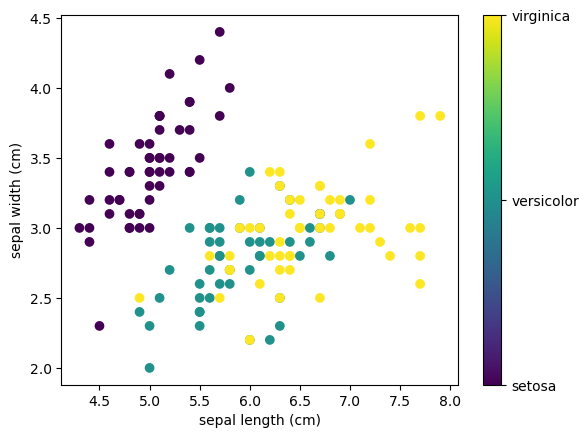

In [204]:
# Plot sepal with and length for the different flowers
x_idx = 0
y_idx = 1

plt.scatter(X[:, x_idx], X[:, y_idx], c=y)

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel(iris.feature_names[x_idx])
plt.ylabel(iris.feature_names[y_idx])

plt.show()


Answer: From the visualisation, we can see that 